# Exploratory Data Analysis

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import os
import pprint

## Load Dataset

In [ ]:
DATA_DIR = "/content/drive/MyDrive/Projects/HRV/dataset/for_ml"

In [ ]:
!du -csbh "/content/drive/MyDrive/Projects/HRV/dataset"

6.8G	/content/drive/MyDrive/Projects/HRV/dataset
6.8G	total


In [ ]:
df_healthy_rri = pd.read_csv(os.path.join(DATA_DIR, "df_healthy_rri.csv"))
df_nsrdb = pd.read_csv(os.path.join(DATA_DIR, "df_nsrdb.csv"))
df_chfdb = pd.read_csv(os.path.join(DATA_DIR, "df_chfdb.csv"))
df_sddb = pd.read_csv(os.path.join(DATA_DIR, "df_sddb.csv"))
df_shareedb = pd.read_csv(os.path.join(DATA_DIR, "df_shareedb.csv"))
df_nsr2db = pd.read_csv(os.path.join(DATA_DIR, "df_nsr2db.csv"))
df_chf2db = pd.read_csv(os.path.join(DATA_DIR, "df_chf2db.csv"))
df = pd.concat([df_healthy_rri, df_nsrdb, df_chfdb, df_sddb, df_shareedb, df_nsr2db, df_chf2db], axis=0).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      414 non-null    object 
 1   db_source               414 non-null    object 
 2   age                     414 non-null    object 
 3   gender                  406 non-null    object 
 4   fs                      414 non-null    object 
 5   signal_length           414 non-null    object 
 6   recording_time_hours    414 non-null    object 
 7   recording_time_seconds  414 non-null    object 
 8   rri_length              414 non-null    int64  
 9   nni_length              414 non-null    int64  
 10  mean_nni                414 non-null    float64
 11  sdnn                    414 non-null    float64
 12  sdsd                    414 non-null    float64
 13  nni_50                  414 non-null    int64  
 14  pnni_50                 414 non-null    fl

In [ ]:
# df.info() do not record "?" as null value so change "?" into np.nan
df = df.replace("?", np.nan)
df['age'] = df['age'].astype(dtype=np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      414 non-null    object 
 1   db_source               414 non-null    object 
 2   age                     409 non-null    float64
 3   gender                  385 non-null    object 
 4   fs                      278 non-null    float64
 5   signal_length           195 non-null    float64
 6   recording_time_hours    195 non-null    float64
 7   recording_time_seconds  195 non-null    float64
 8   rri_length              414 non-null    int64  
 9   nni_length              414 non-null    int64  
 10  mean_nni                414 non-null    float64
 11  sdnn                    414 non-null    float64
 12  sdsd                    414 non-null    float64
 13  nni_50                  414 non-null    int64  
 14  pnni_50                 414 non-null    fl

In [ ]:
db_sources = df['db_source'].unique()
print(db_sources)

['rr-interval-healthy-subjects' 'nsrdb' 'chfdb' 'sddb' 'shareedb' 'nsr2db'
 'chf2db']


In [ ]:
time_domain_indices = ['mean_nni', 'sdnn', 'sdsd', 'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'rmssd', 'median_nni', 'range_nni', 'cvsd', 'cvnni', 'mean_hr', 'max_hr', 'min_hr', 'std_hr']
freq_domain_indices = ['lf', 'hf', 'lf_hf_ratio', 'lfnu', 'hfnu', 'total_power', 'vlf']

columns_needed = ['age', 'gender', 'db_source'] + freq_domain_indices + time_domain_indices + ['cardiac_info', 'risk']

In [ ]:
map_gender = {
    "m": 1,
    "f": 0
}

In [ ]:
df = pd.concat([df_healthy_rri, df_nsrdb, df_chfdb, df_sddb, df_shareedb, df_nsr2db, df_chf2db], axis=0).reset_index()
df = df[columns_needed]
df = df.dropna()
df = df[(df.age != "?") & (df.gender != "?")]
df['age'] = np.array(df['age'], dtype=np.float16)
df['gender'] = df['gender'].map(lambda x: map_gender[x.lower()])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           381 non-null    float16
 1   gender        381 non-null    int64  
 2   db_source     381 non-null    object 
 3   lf            381 non-null    float64
 4   hf            381 non-null    float64
 5   lf_hf_ratio   381 non-null    float64
 6   lfnu          381 non-null    float64
 7   hfnu          381 non-null    float64
 8   total_power   381 non-null    float64
 9   vlf           381 non-null    float64
 10  mean_nni      381 non-null    float64
 11  sdnn          381 non-null    float64
 12  sdsd          381 non-null    float64
 13  nni_50        381 non-null    int64  
 14  pnni_50       381 non-null    float64
 15  nni_20        381 non-null    int64  
 16  pnni_20       381 non-null    float64
 17  rmssd         381 non-null    float64
 18  median_nni    381 non-null    

## EDA

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,age,gender,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,risk
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,44.687500,0.577428,2921.505232,1893.417740,2.202522,64.361290,35.638710,6397.865884,1582.942913,726.306418,128.851913,61.810442,21140.089239,21.381140,43413.958005,40.723017,61.810442,721.093750,1278.324557,0.078704,0.172031,91.787407,194.188472,40.659125,16.860755,0.128609
std,30.953125,0.494618,5067.784659,3162.762935,1.380269,11.053653,11.053653,10074.223906,2162.515442,179.150607,59.793972,47.188398,19285.895107,20.549156,20804.882038,22.559793,47.188398,185.767117,387.673291,0.047637,0.053838,25.626599,10.781797,12.475445,5.372055,0.335207
min,0.083008,0.000000,43.024440,16.948170,0.451584,31.109742,11.120330,94.346277,23.868216,386.481803,21.789875,8.752250,77.000000,0.038683,1282.000000,0.870693,8.752250,383.000000,337.000000,0.018022,0.037947,55.660670,118.343195,30.000000,3.889819,0.000000
25%,5.000000,0.000000,401.621224,175.806952,1.293737,56.403027,27.310933,1042.286936,408.289107,577.553959,80.318985,24.919798,4627.000000,3.511778,27596.000000,22.423902,24.919798,562.500000,961.000000,0.039745,0.136444,72.700639,196.923077,30.612245,13.550018,0.000000
50%,63.000000,1.000000,1128.024476,614.764239,1.613267,61.733717,38.266283,2849.587144,929.186429,765.159337,127.460893,47.527621,14479.000000,14.206261,41599.000000,37.688727,47.527621,750.000000,1340.000000,0.064469,0.165513,81.437213,196.923077,36.398104,16.832847,0.000000
75%,69.000000,1.000000,3205.385323,2269.950881,2.661537,72.689067,43.596973,7142.191201,1898.037583,865.510110,164.122196,87.650301,32735.000000,34.601416,59150.000000,58.415514,87.650301,859.375000,1656.000000,0.106413,0.200312,106.644290,197.368421,46.829268,19.365455,0.000000
max,92.000000,1.000000,42612.826531,25487.017619,7.992539,88.879670,68.890258,77936.678226,19741.660939,1136.521151,355.751851,276.308049,81118.000000,82.666878,98920.000000,93.320891,276.308049,1195.312500,1696.000000,0.274417,0.407956,157.349951,200.000000,93.603744,38.750319,1.000000


In [ ]:
pd.reset_option('display.max_columns')

### Databases

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
_df = df.copy()

_df.groupby(by=['db_source']).mean(numeric_only=True)

,age,gender,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,risk
db_source,,,,,,,,,,,,,,,,,,,,,,,,,,
chf2db,55.299999,0.800000,571.570427,407.922347,1.638798,59.850334,40.149666,1435.172800,455.680026,666.593319,56.579760,31.464006,9096.200000,8.122781,22895.500000,20.283834,31.464006,664.843750,1335.937500,0.047123,0.084404,92.123836,196.430769,38.588066,7.948182,1.000000
chfdb,56.000000,0.714286,1366.313193,872.299298,1.415204,58.057941,41.942059,3070.640633,832.028143,689.654491,76.117584,43.827929,12648.142857,12.994784,16931.500000,17.276156,43.827929,681.142857,1394.571429,0.060940,0.109123,90.840678,196.640765,35.889487,9.542785,1.000000
nsr2db,61.361111,0.555556,880.584080,321.693283,3.376900,73.902145,26.097855,2103.522508,901.245145,782.955537,142.195704,31.955837,8084.092593,7.642836,35276.925926,33.136174,31.955837,765.914352,1190.899884,0.040756,0.182043,80.084594,192.541980,40.871736,15.002461,0.000000
nsrdb,34.333332,0.277778,4147.055297,2588.241547,1.603128,61.315755,38.684245,8894.594492,2159.297648,773.855706,166.095973,82.427339,34690.611111,30.617945,65167.111111,57.802223,82.427339,769.748264,1659.722222,0.106670,0.213244,82.417176,196.923077,30.556508,21.343213,0.000000
rr-interval-healthy-subjects,5.479423,0.515625,650.214847,399.392318,2.766750,68.821472,31.178528,1686.209443,636.602278,540.336881,88.134617,29.914333,10899.023438,9.442767,40425.992188,30.220943,29.914333,532.292969,872.218750,0.052387,0.156904,119.858914,190.656245,53.201852,18.072295,0.000000
sddb,60.222221,0.611111,8891.306353,4650.320140,1.997692,62.348083,37.651917,17854.557734,4312.931241,819.303318,166.850911,101.889189,31052.611111,36.359003,44296.277778,51.555241,101.889189,826.000000,1570.888889,0.121257,0.199592,79.611220,197.514620,32.344288,19.441938,0.444444
shareedb,71.762589,0.647482,5199.855063,3642.539431,1.450709,58.162039,41.837961,11290.190221,2447.795727,865.338613,161.930159,98.915107,34326.215827,36.374729,50538.848921,53.558967,98.915107,865.726169,1583.127248,0.112609,0.185805,73.345137,196.887659,32.040778,16.930558,0.122302


In [ ]:
_df.groupby(by=['db_source']).std(numeric_only=True)

,age,gender,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,risk
db_source,,,,,,,,,,,,,,,,,,,,,,,,,,
chf2db,11.155965,0.421637,667.309895,591.815602,0.779548,8.779093,8.779093,1474.372408,386.564629,86.115932,24.736271,17.251984,12462.430696,11.233468,14747.430610,13.830412,17.251984,85.775573,358.335604,0.026314,0.035920,11.816151,1.556814,10.544333,3.313903,0.000000
chfdb,11.495819,0.468807,1723.550033,1006.247495,0.291888,4.828668,4.828668,4015.639241,1362.395413,128.581892,33.417170,29.685705,13560.961106,13.828451,15704.789450,16.173859,29.685705,130.073859,225.967225,0.037736,0.046391,15.882552,1.552627,4.834742,4.110940,0.000000
nsr2db,11.625613,0.501570,599.719194,341.728252,1.599281,9.650661,9.650661,1235.458761,438.041684,77.606518,31.005738,12.455899,6767.083740,6.461912,10670.443146,10.814802,12.455899,84.729163,245.962157,0.015108,0.037195,7.619850,13.302010,6.449086,3.190031,0.000000
nsrdb,8.436615,0.460889,1395.015477,813.565909,0.228890,3.260803,3.260803,2809.254726,744.982897,70.981878,36.616378,13.630034,13146.233646,10.972983,11340.639737,10.106106,13.630034,78.038466,40.922818,0.015161,0.032887,6.536698,0.000000,0.659986,2.486772,0.000000
rr-interval-healthy-subjects,11.067025,0.501719,634.186516,541.732129,1.535537,12.410827,12.410827,1668.657132,589.544580,139.350157,41.908177,18.679356,12034.505210,12.345996,19926.747226,19.765526,18.679356,137.640015,271.836592,0.022107,0.040279,23.558248,15.745977,12.566165,3.046431,0.000000
sddb,21.686416,0.501631,12250.018645,5693.483172,1.580104,9.951942,9.951942,22712.994069,5308.860794,136.275145,88.178869,63.561239,26010.197749,27.850559,28612.718992,28.705446,63.561239,152.327820,179.964993,0.066669,0.086985,13.185989,0.620269,3.766443,9.109191,0.511310
shareedb,6.945526,0.479482,5834.687328,3949.444432,0.435438,6.178066,6.178066,11720.767108,2414.158426,92.855827,53.404340,45.653999,18642.280041,19.418445,19488.942930,20.386307,45.653999,109.988205,154.708220,0.046368,0.053702,7.602164,0.417570,3.211678,6.027372,0.328819


In [ ]:
_df.groupby(by=['db_source']).mean(numeric_only=True).astype('str') + " ± " + \
_df.groupby(by=['db_source']).std(numeric_only=True).astype('str')

,age,gender,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,risk
db_source,,,,,,,,,,,,,,,,,,,,,,,,,,
chf2db,55.3 ± 11.155965021259055,0.8 ± 0.4216370213557839,571.5704267478776 ± 667.3098947502297,407.9223467392393 ± 591.8156022218627,1.6387981948259374 ± 0.7795478569117629,59.85033386364047 ± 8.779093423901456,40.14966613635953 ± 8.779093423901465,1435.1727999495693 ± 1474.3724078950288,455.6800264624523 ± 386.56462939627454,666.5933186951619 ± 86.1159320668895,56.57975982041156 ± 24.736271122074044,31.4640059339917 ± 17.251983862961715,9096.2 ± 12462.43069567267,8.12278129226689 ± 11.23346782592891,22895.5 ± 14747.430610486394,20.283833874881743 ± 13.830411592452583,31.46400604994609 ± 17.25198381764976,664.84375 ± 85.77557345617753,1335.9375 ± 358.33560440171783,0.047122693504212096 ± 0.0263136288927526,0.08440366193130812 ± 0.0359200927269611,92.12383577552339 ± 11.816150661614298,196.43076923076924 ± 1.5568136173136675,38.588066098918105 ± 10.544333483893716,7.948182092199505 ± 3.313903458860806,1.0 ± 0.0
chfdb,56.0 ± 11.495818637828545,0.7142857142857143 ± 0.4688072309384954,1366.3131925340724 ± 1723.5500332894426,872.2992978928853 ± 1006.2474952883358,1.415203627845985 ± 0.29188759644679907,58.05794071741331 ± 4.828668306371226,41.94205928258669 ± 4.828668306371227,3070.640633103739 ± 4015.6392407707644,832.0281426767817 ± 1362.3954126780263,689.6544909760572 ± 128.58189180272433,76.11758445508022 ± 33.41716974578124,43.82792930452589 ± 29.685705200644566,12648.142857142857 ± 13560.961106494928,12.994784428188469 ± 13.828451065358513,16931.5 ± 15704.789449522914,17.276156152105067 ± 16.173859066540864,43.82792933567772 ± 29.685705215382807,681.1428571428571 ± 130.07385898484287,1394.5714285714287 ± 225.96722508626516,0.060939595465896515 ± 0.0377362328736554,0.10912340118593654 ± 0.04639064175219098,90.84067811464975 ± 15.882551692319552,196.64076524978782 ± 1.5526273384463114,35.889486544257885 ± 4.834742475888209,9.542784893190827 ± 4.110939780024357,1.0 ± 0.0
nsr2db,61.36111 ± 11.625612853257952,0.5555555555555556 ± 0.5015698625755192,880.5840804129562 ± 599.7191940827023,321.6932826508112 ± 341.7282520113762,3.37689950011124 ± 1.599281369928545,73.9021451325123 ± 9.650661475252049,26.097854867487698 ± 9.650661475252047,2103.5225084715817 ± 1235.4587609847686,901.2451454078144 ± 438.04168398565935,782.9555369447534 ± 77.60651760968416,142.19570370828694 ± 31.005738409681943,31.955837092802934 ± 12.455898916906422,8084.092592592592 ± 6767.083740412513,7.642835966521866 ± 6.461912084066091,35276.92592592593 ± 10670.443146271185,33.13617428753661 ± 10.814801865814255,31.955837182400458 ± 12.455898882882945,765.9143518518518 ± 84.729162623411,1190.8998842592594 ± 245.96215678134314,0.04075622959468896 ± 0.015108245938130364,0.18204276208564743 ± 0.03719533767994866,80.08459419560774 ± 7.619849792022712,192.54198005653944 ± 13.302010427643726,40.87173578268828 ± 6.449086089795028,15.002461002880555 ± 3.190031480612425,0.0 ± 0.0
nsrdb,34.333332 ± 8.436614877321073,0.2777777777777778 ± 0.4608885989624768,4147.055297254667 ± 1395.0154766655733,2588.2415466281514 ± 813.5659089671557,1.603128030497149 ± 0.22889017069633158,61.315754910718205 ± 3.260802890235058,38.684245089281795 ± 3.260802890235058,8894.594492225562 ± 2809.254725840597,2159.297648342744 ± 744.9828974612545,773.855706249313 ± 70.98187802056967,166.09597298015188 ± 36.61637813658057,82.42733905002176 ± 13.6300338913612,34690.61111111111 ± 13146.233645997754,30.61794533386099 ± 10.972982513703567,65167.11111111111 ± 11340.639736539864,57.802222886564046 ± 10.106106131010833,82.42733911242698 ± 13.630033871681958,769.7482638888889 ± 78.03846565808541,1659.7222222222222 ± 40.92281799034913,0.1066700063472501 ± 0.015160986476551029,0.21324397285905466 ± 0.032886755618025836,82.41717640415224 ± 6.536698383298335,196.92307692307693 ± 0.0,30.556507634901678 

In [ ]:
pd.reset_option('display.max_columns')

### Age

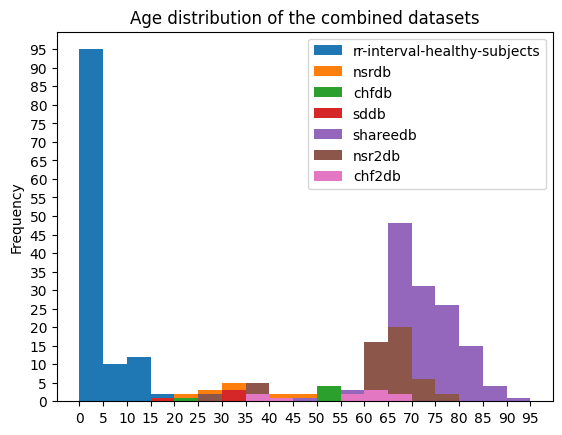

In [ ]:
# distribusi umur bar plot

bins = [i for i in range(0, 100, 5)]
xticks = [i for i in range(0, 100, 10)]
for db in df['db_source'].unique():
    _df = df[df['db_source'] == db]
    _df['age'].plot.hist(bins=bins)

plt.legend(df['db_source'].unique())
plt.title("Age distribution of the combined datasets")
plt.xticks(bins)
plt.yticks(bins)
plt.show()

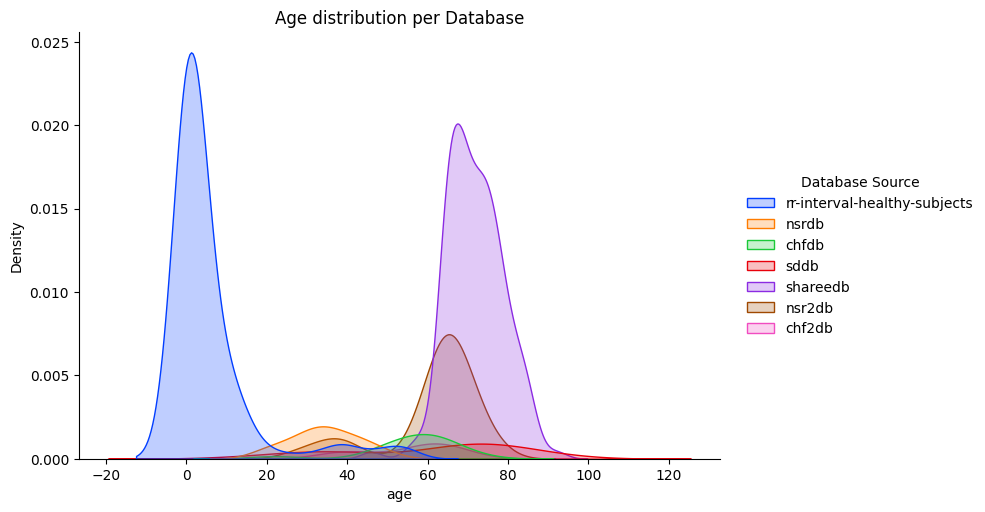

In [ ]:
# distribusi umur area plot

# Ref: https://stackoverflow.com/a/65344757
chart = sns.displot(data=df, x='age', hue='db_source', kind='kde', fill=True, palette=sns.color_palette('bright')[:7], height=5, aspect=1.5)
chart._legend.set_title("Database Source")
plt.title("Age distribution per Database")
plt.show()

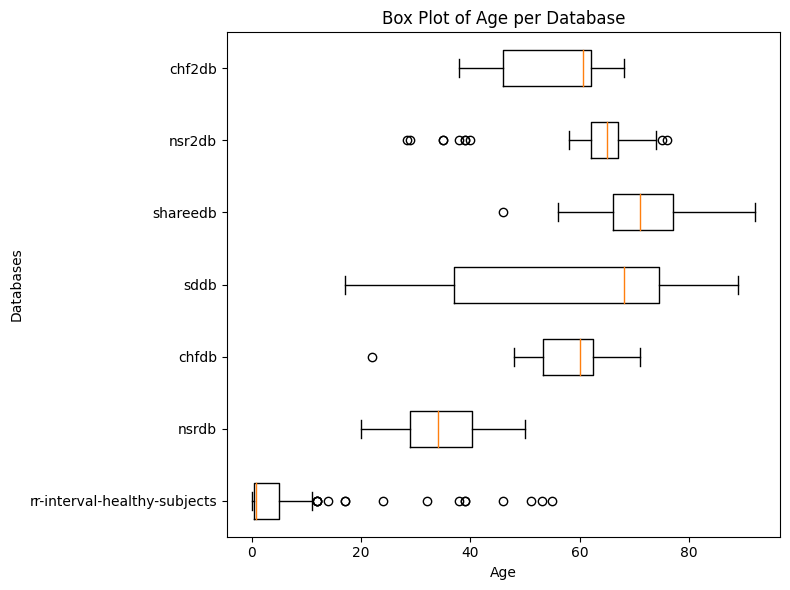

In [ ]:
# distribusi umur box plot

fig = plt.figure(figsize=(8, 6))

data_per_metric = []
for db in db_sources:
    _df = df[df['db_source'] == db]
    data_per_metric.append(_df["age"])
plt.boxplot(data_per_metric, vert=False)

plt.xlabel("Age")
plt.yticks(np.arange(1, len(db_sources)+1), db_sources)
plt.ylabel('Databases')
plt.title("Box Plot of Age per Database")
plt.tight_layout()
plt.show()

### Gender

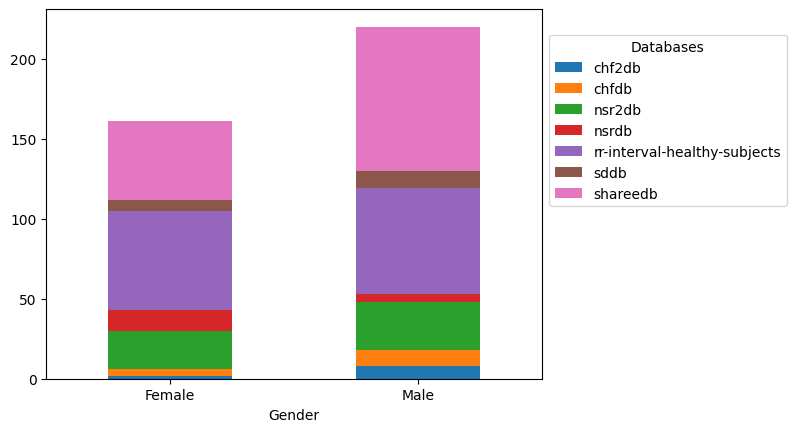

In [ ]:
# distribusi kelamin plot bar stack

_df = df.copy()
_df['gender'] = _df['gender'].map(lambda x: "Male" if x == 1 else "Female")
_df[['gender', 'db_source']].value_counts().unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.95), title='Databases')
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

### Risk

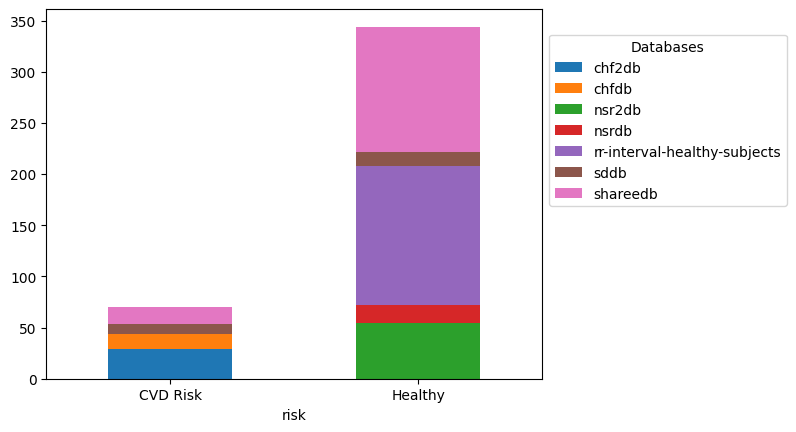

In [ ]:
# distribusi risk plot bar stack

_df = pd.concat([df_healthy_rri, df_nsrdb, df_chfdb, df_sddb, df_shareedb, df_nsr2db, df_chf2db], axis=0).reset_index()

# _df = df.copy()
_df['risk'] = _df['risk'].map(lambda x: "CVD Risk" if x == 1 else "Healthy")
_df[['risk', 'db_source']].value_counts().unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.95), title='Databases')
plt.xlabel("risk")
plt.xticks(rotation=0)
plt.show()

### Cardiac Info

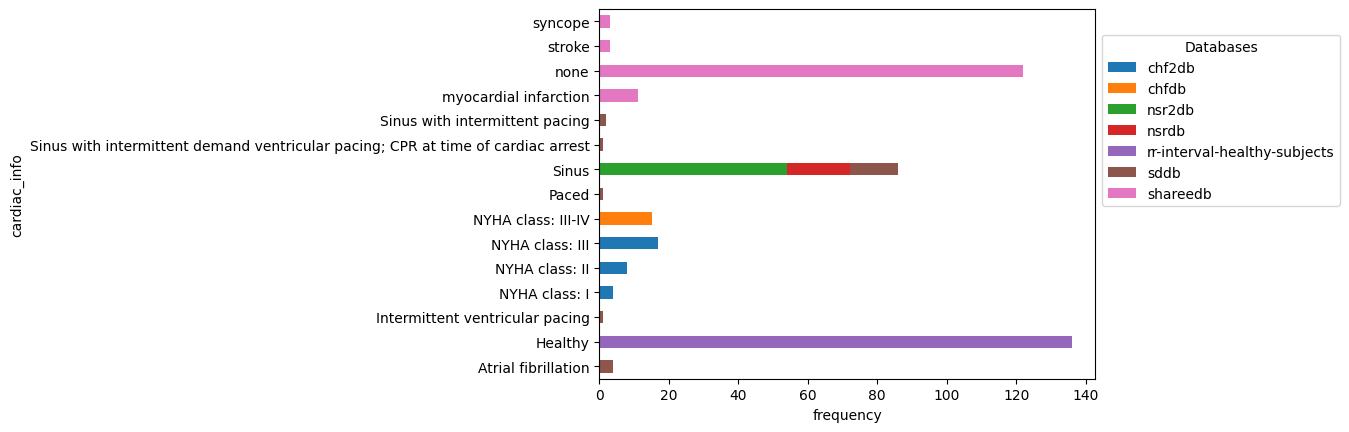

In [ ]:
# distribusi cardiac_info plot bar stack

# _df = df.copy()
_df[['cardiac_info', 'db_source']].value_counts().unstack().plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.95), title='Databases')
plt.xlabel("frequency")
plt.xticks(rotation=0)
plt.show()

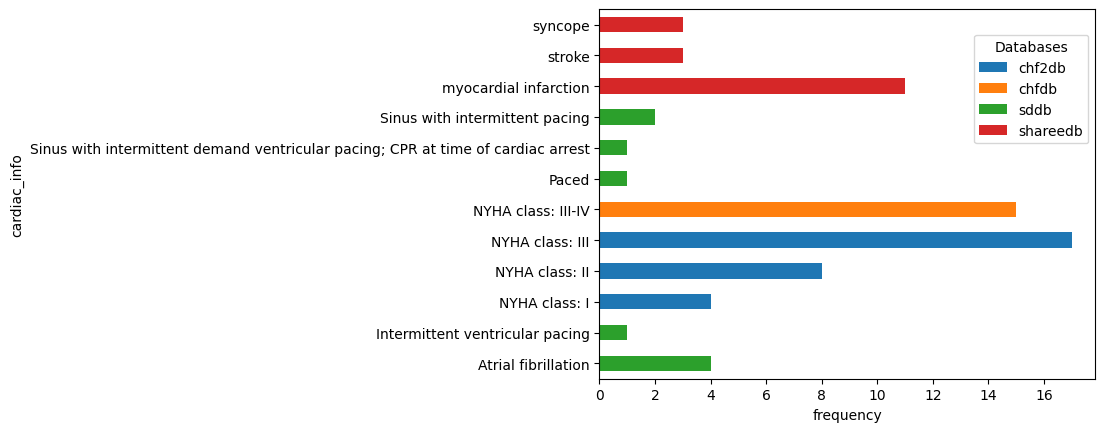

In [ ]:
# distribusi cardiac_info plot bar stack tanpa informasi sehat/normal

# _df = df.copy()
_df = _df[~_df["cardiac_info"].isin(["none", "Sinus", "Healthy"])]
_df[['cardiac_info', 'db_source']].value_counts().unstack().plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.95), title='Databases')
plt.xlabel("frequency")
plt.xticks(rotation=0)
plt.show()

### Time Domain

#### Databases

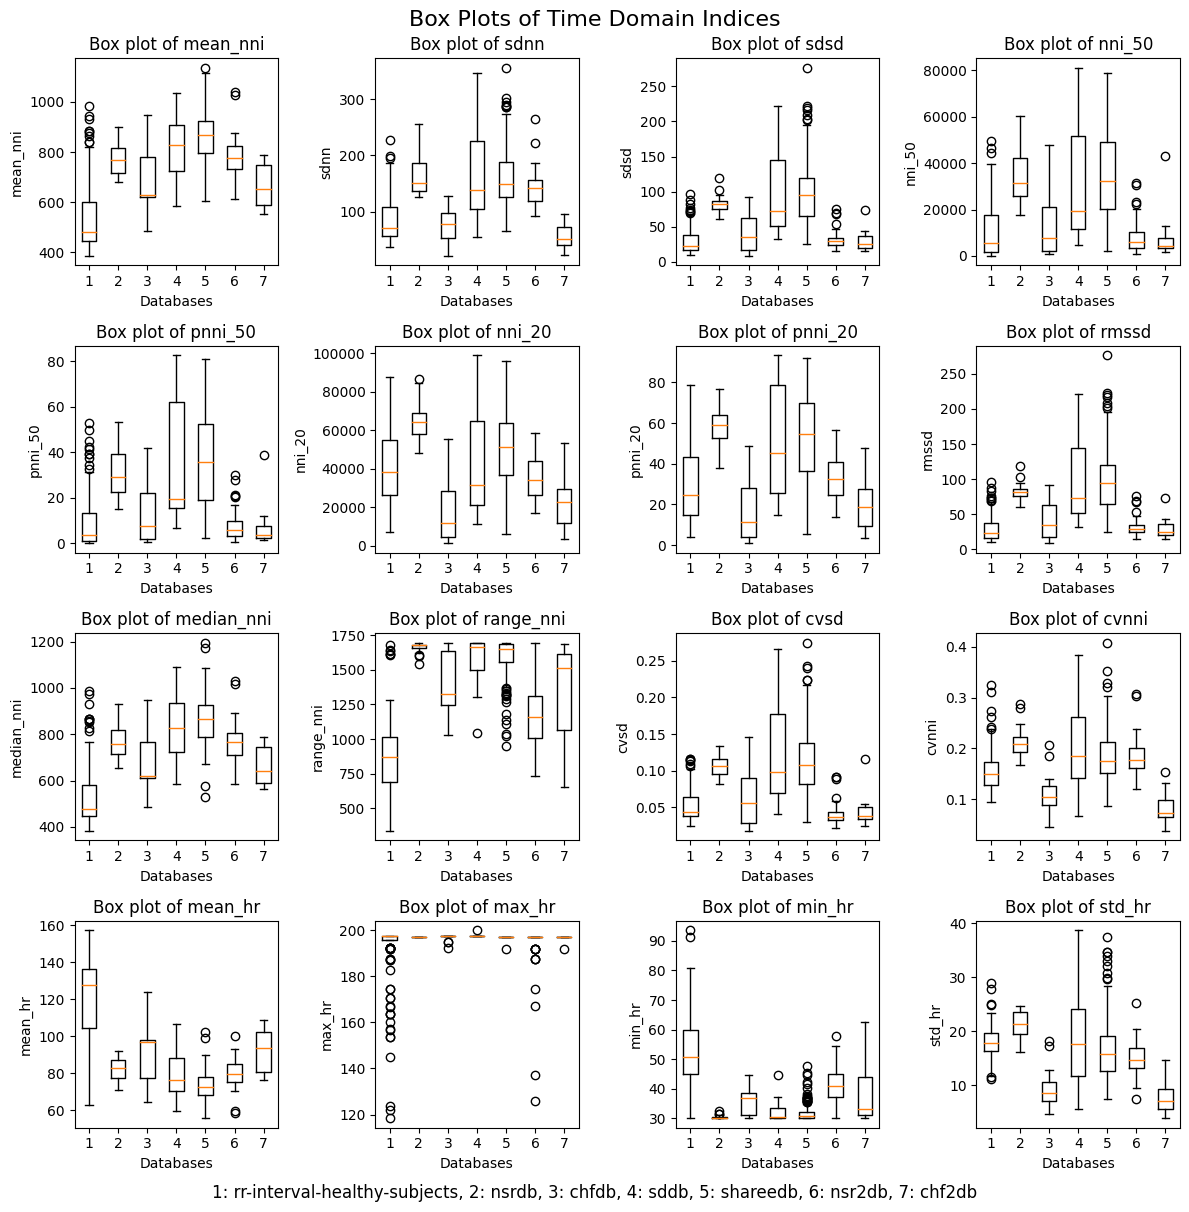

In [ ]:
# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(time_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(time_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(time_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    data_per_metric = []
    for db in db_sources:
        _df = df[df['db_source'] == db]
        data_per_metric.append(_df[fitur])
    plt.boxplot(data_per_metric)

    plt.xlabel('Databases')
    plt.ylabel(fitur)
    plt.title(f"Box plot of {fitur}")

# remove unused plots
for index in range(len(time_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

plt.suptitle("Box Plots of Time Domain Indices", fontsize=16)
plt.tight_layout()
text = ["{0}: {1}".format(idx+1, db) for idx, db in enumerate(db_sources)]
plt.text(.5, -0.01, ", ".join(text), transform=fig.transFigure, horizontalalignment='center', fontsize=12)
plt.show()

#### Age

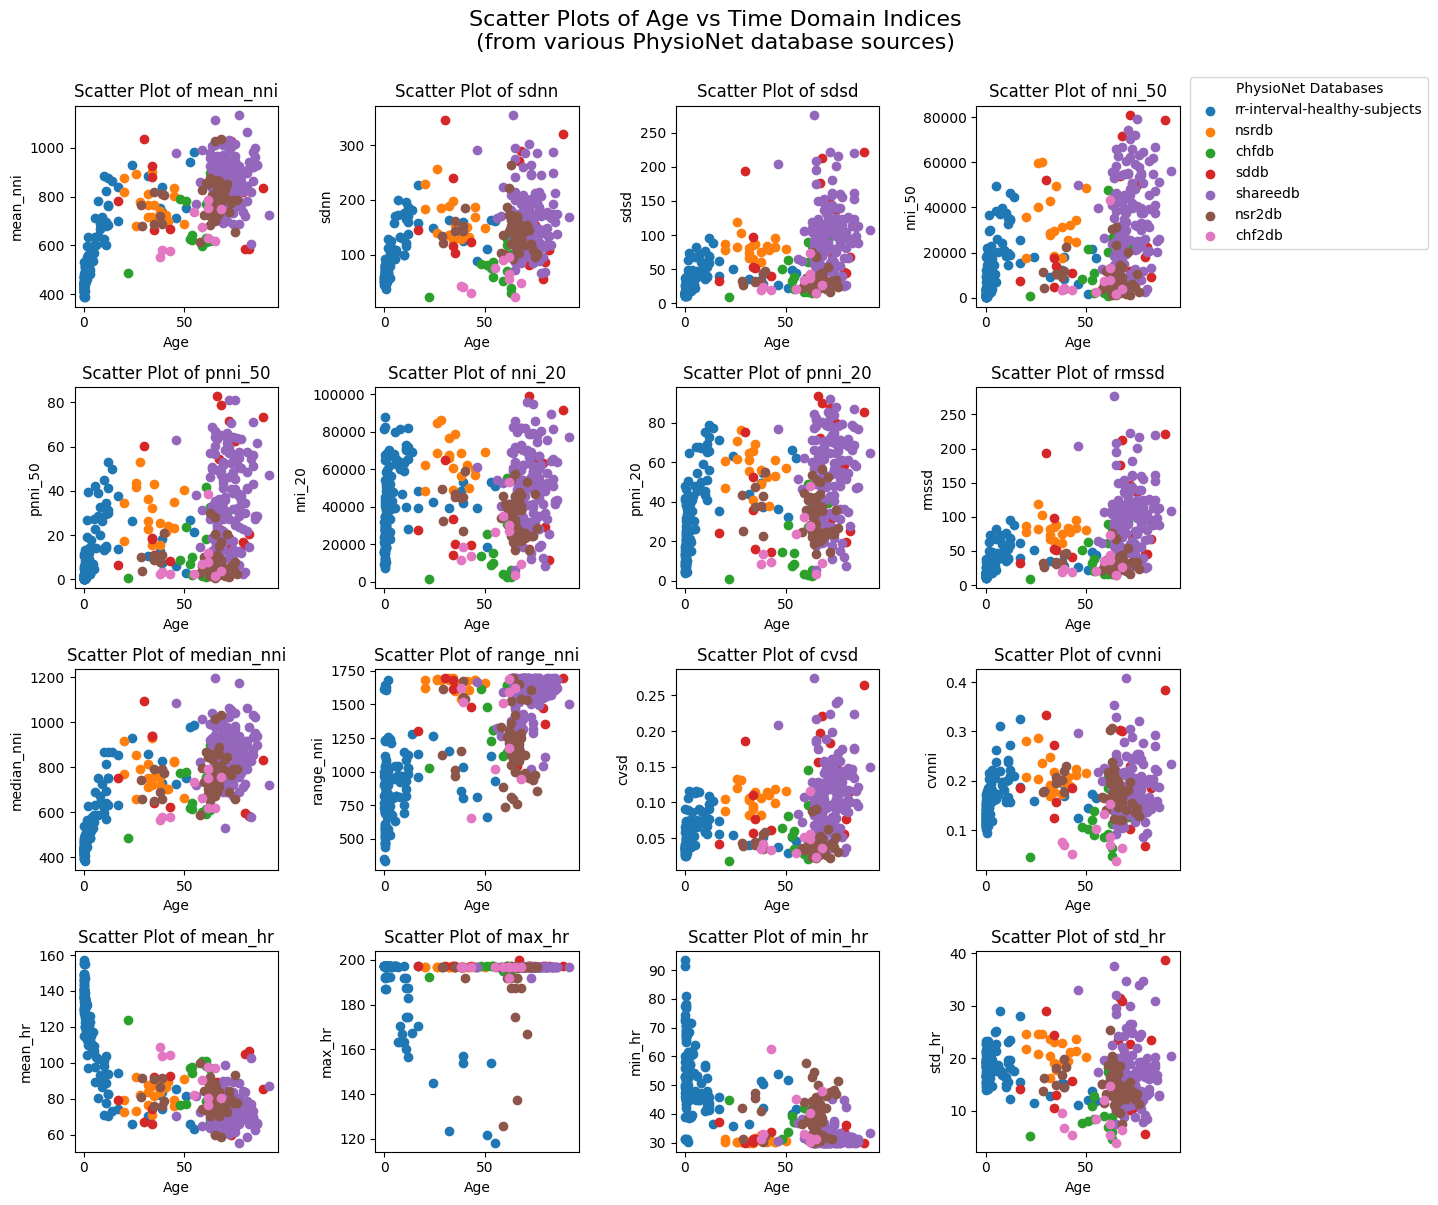

In [ ]:
# Age against all indices

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(time_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(time_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(time_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    for db in db_sources:
        _df = df[df['db_source'] == db]
        plt.scatter(x=_df['age'], y=_df[fitur])

    plt.xlabel("Age")
    plt.ylabel(fitur)
    plt.title(f"Scatter Plot of {fitur}")

# remove unused plots
for index in range(len(time_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

fig.legend(labels=db_sources, bbox_to_anchor=(1.2, 0.95), title='PhysioNet Databases')
plt.suptitle("Scatter Plots of Age vs Time Domain Indices\n(from various PhysioNet database sources)", y=1.0, x=0.6, fontsize=16)
plt.tight_layout()
plt.show()

#### Gender

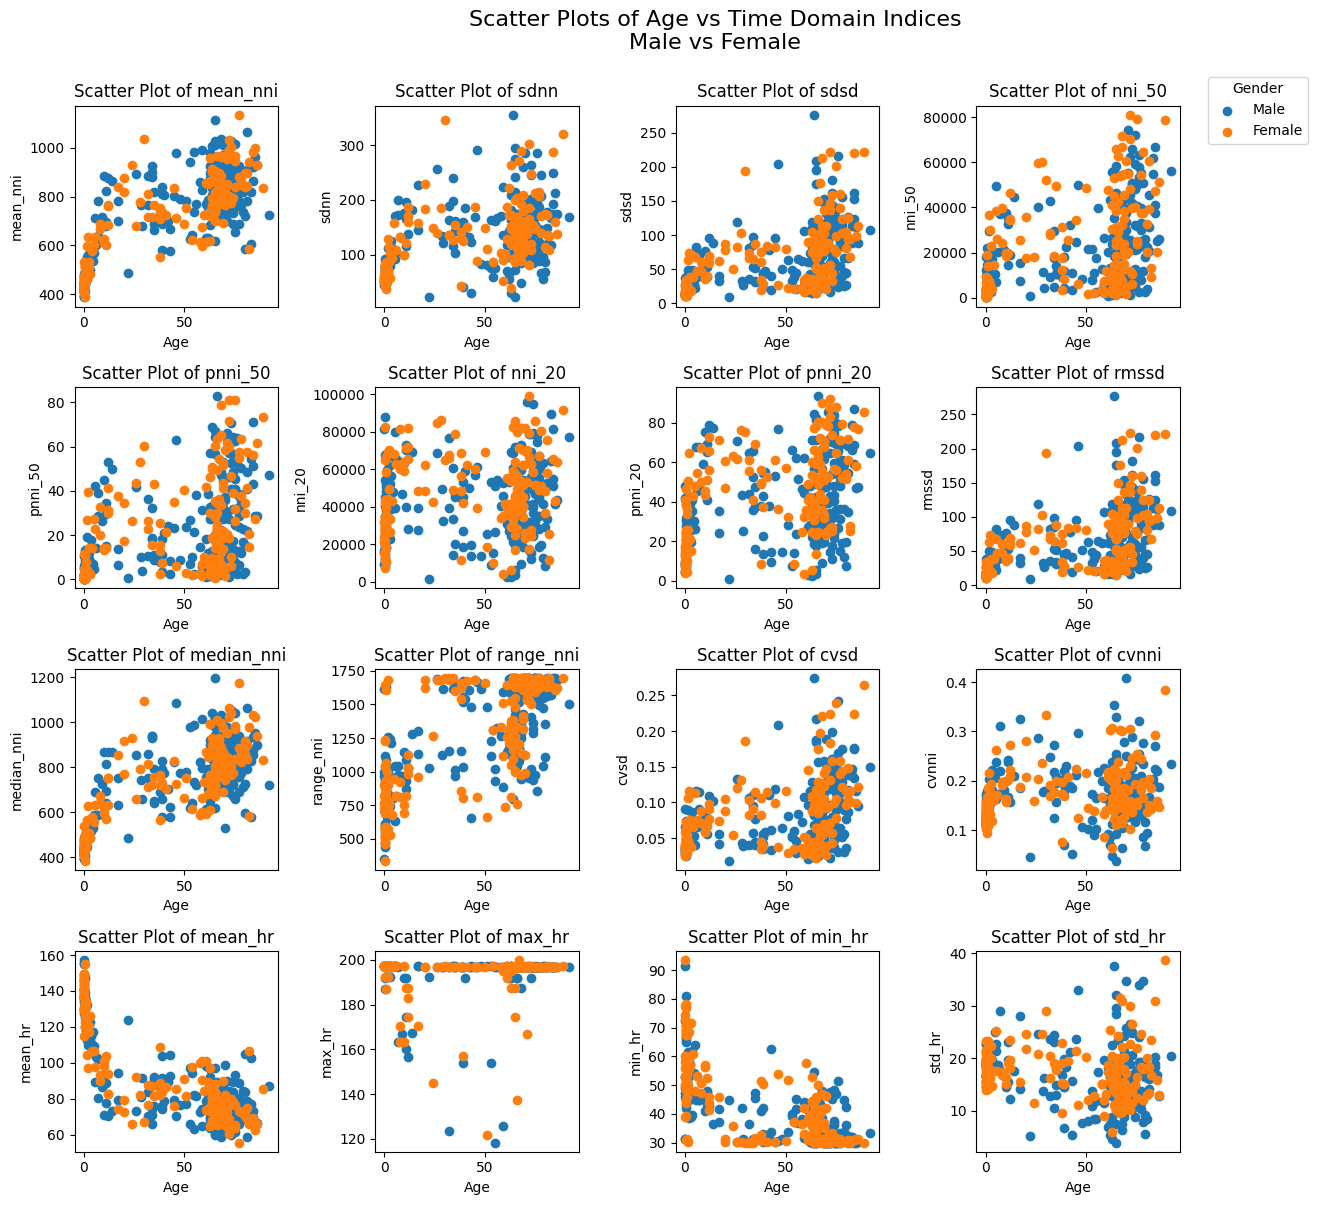

In [ ]:
# Age against all indices
_df = df.copy()
_df['gender'] = _df['gender'].map(lambda x: "Male" if x==1 else "Female")

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(time_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(time_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(time_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    for gender in _df['gender'].unique():
        __df = _df[_df['gender'] == gender]
        plt.scatter(x=__df['age'], y=__df[fitur])

    plt.xlabel("Age")
    plt.ylabel(fitur)
    plt.title(f"Scatter Plot of {fitur}")

# remove unused plots
for index in range(len(time_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

fig.legend(labels=_df['gender'].unique(), bbox_to_anchor=(1.1, 0.95), title='Gender')
plt.suptitle("Scatter Plots of Age vs Time Domain Indices\nMale vs Female", y=1.0, x=0.6, fontsize=16)
plt.tight_layout()
plt.show()

#### Risk

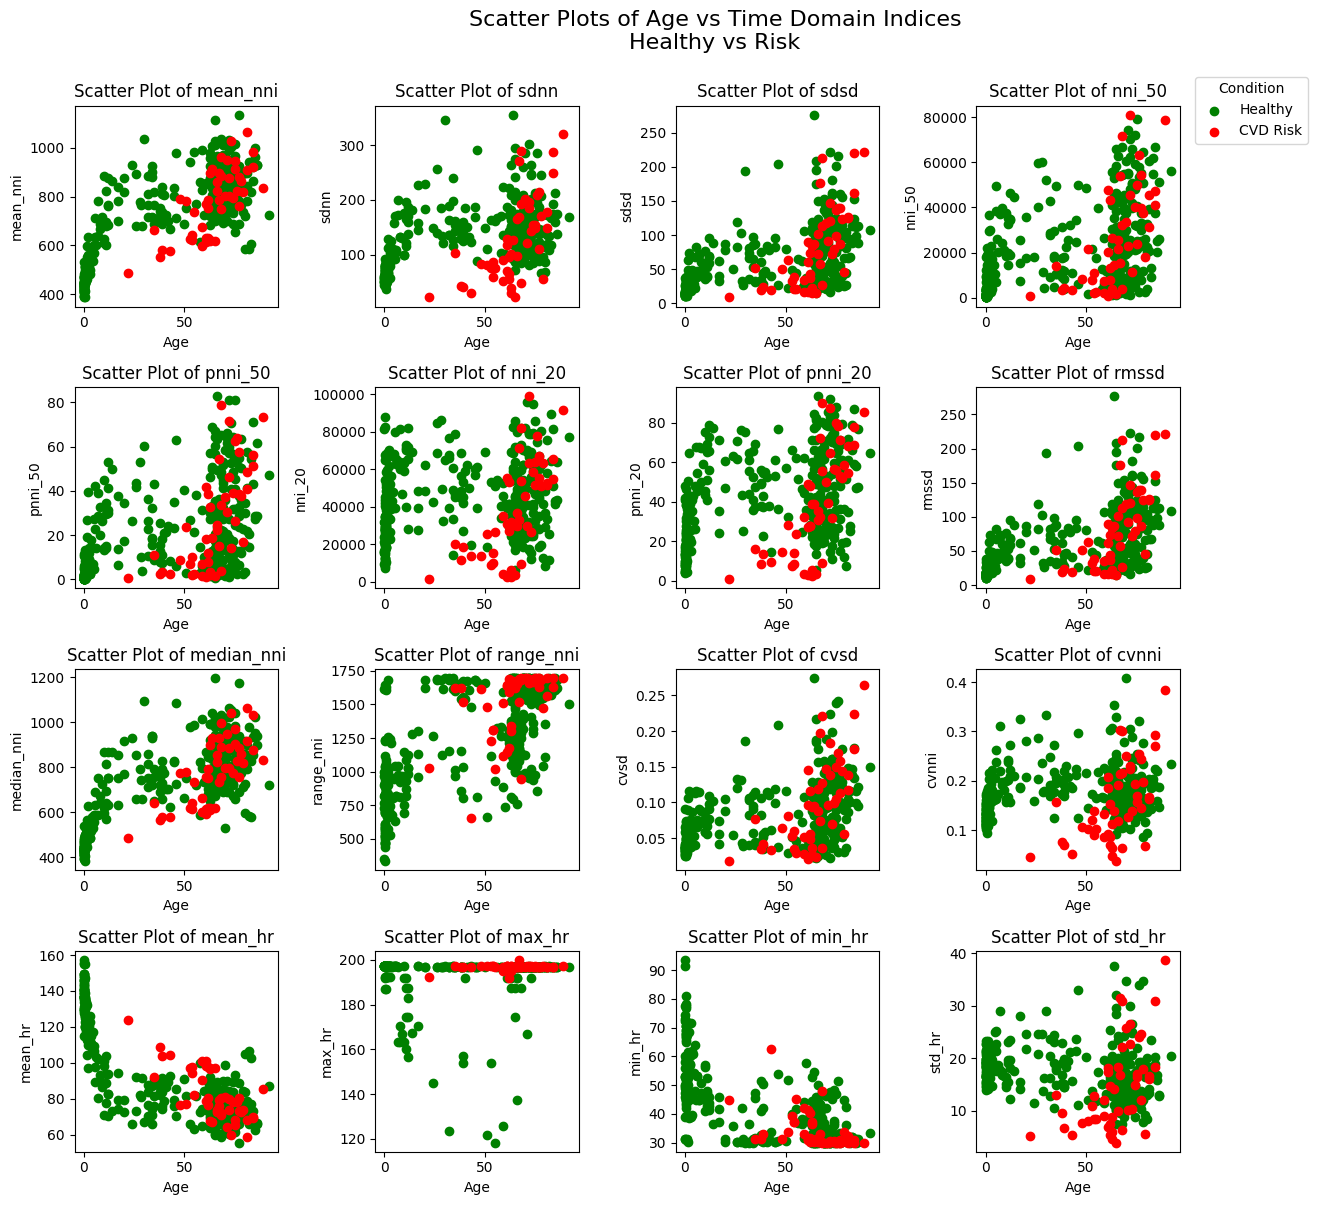

In [ ]:
# Age against all indices
_df = df.copy()
_df['risk'] = _df['risk'].map(lambda x: "CVD Risk" if x==1 else "Healthy")

color_dict = {
    "CVD Risk": 'red',
    "Healthy": 'green'
}

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(time_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(time_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(time_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    for risk in _df['risk'].unique():
        __df = _df[_df['risk'] == risk]
        plt.scatter(x=__df['age'], y=__df[fitur], c=color_dict[risk])

    plt.xlabel("Age")
    plt.ylabel(fitur)
    plt.title(f"Scatter Plot of {fitur}")

# remove unused plots
for index in range(len(time_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

fig.legend(labels=_df['risk'].unique(), bbox_to_anchor=(1.1, 0.95), title='Condition')
plt.suptitle("Scatter Plots of Age vs Time Domain Indices\nHealthy vs Risk", y=1.0, x=0.6, fontsize=16)
plt.tight_layout()
plt.show()

### Frequency Domain

#### Databases

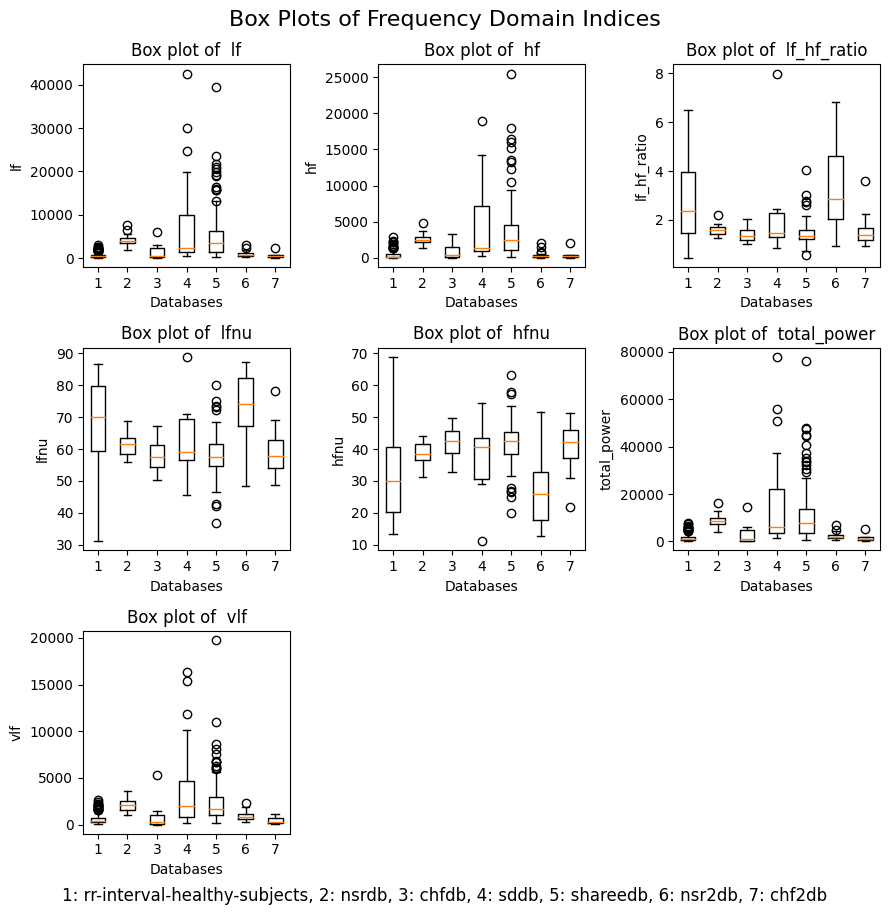

In [ ]:
# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(freq_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(freq_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(freq_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    data_per_metric = []
    for db in db_sources:
        _df = df[df['db_source'] == db]
        data_per_metric.append(_df[fitur])
    plt.boxplot(data_per_metric)

    plt.xlabel('Databases')
    plt.ylabel(fitur)
    plt.title(f"Box plot of  {fitur}")

# remove unused plots
for index in range(len(freq_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

plt.suptitle("Box Plots of Frequency Domain Indices", fontsize=16)
plt.tight_layout()
text = ["{0}: {1}".format(idx+1, db) for idx, db in enumerate(db_sources)]
plt.text(.5, -0.01, ", ".join(text), transform=fig.transFigure, horizontalalignment='center', fontsize=12)
plt.show()

#### Age

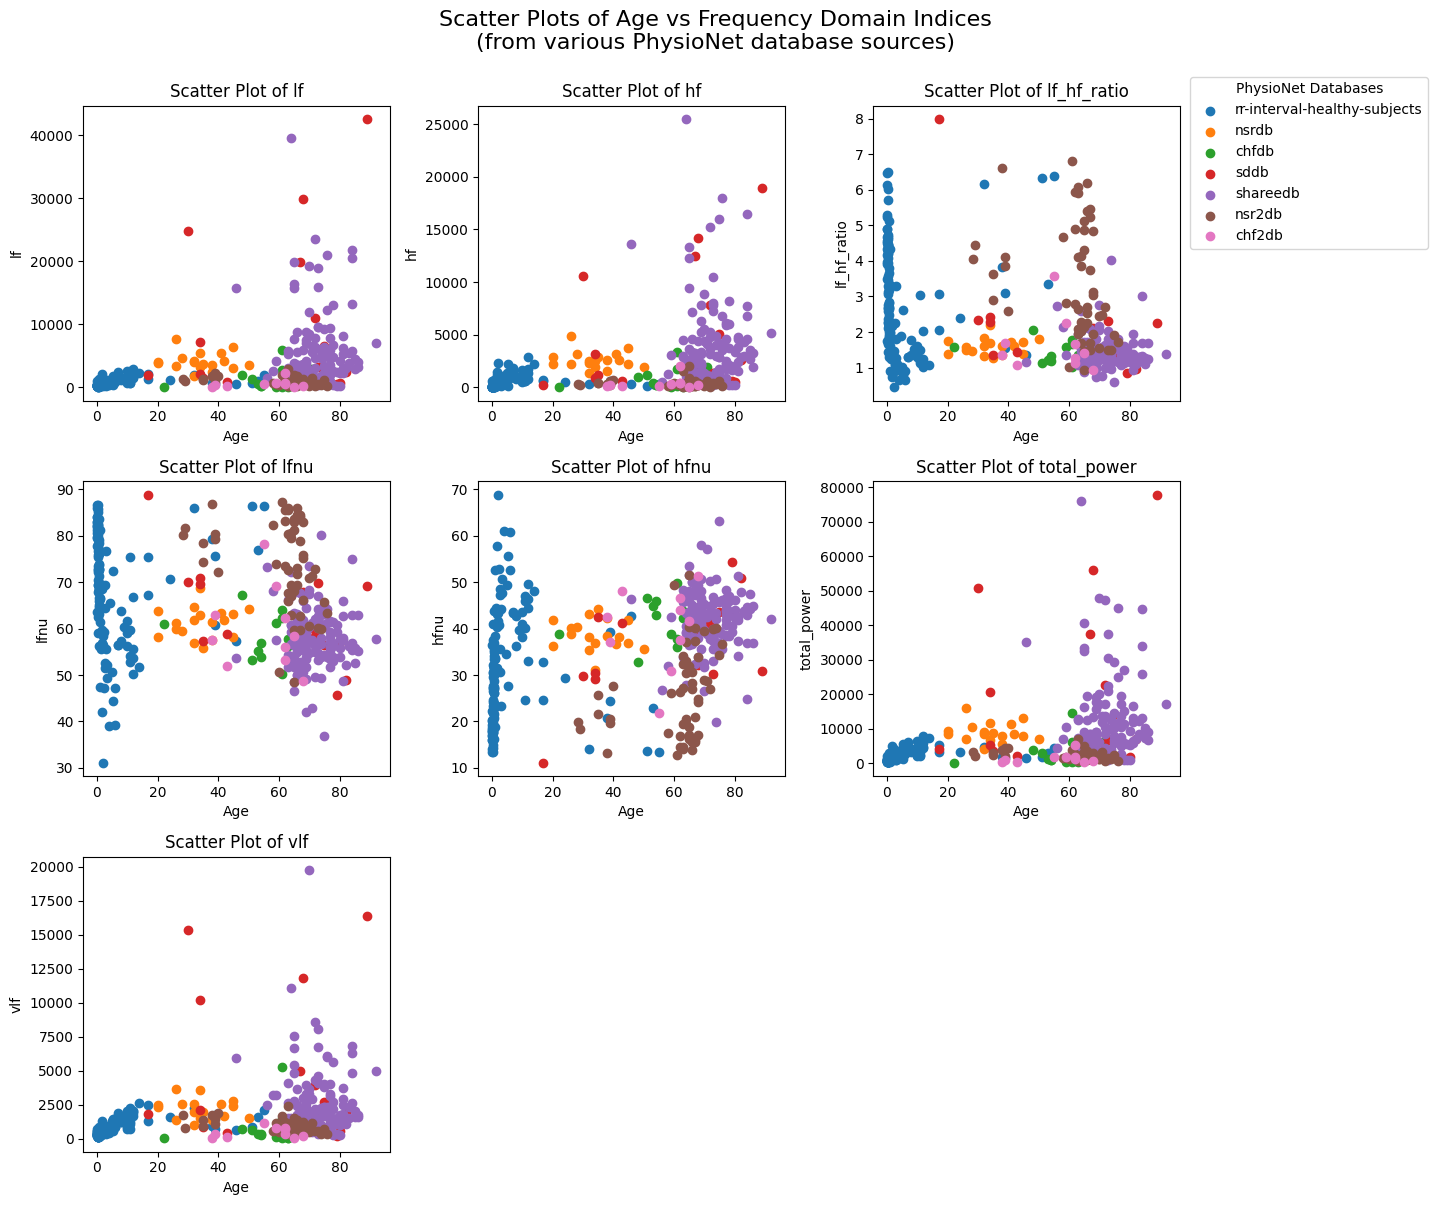

In [ ]:
# Age against all indices

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(freq_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(freq_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*4, tinggi*4))

for index, fitur in enumerate(freq_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    for db in db_sources:
        _df = df[df['db_source'] == db]
        plt.scatter(x=_df['age'], y=_df[fitur])

    plt.xlabel("Age")
    plt.ylabel(fitur)
    plt.title(f"Scatter Plot of {fitur}")

# remove unused plots
for index in range(len(freq_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

fig.legend(labels=db_sources, bbox_to_anchor=(1.2, 0.95), title='PhysioNet Databases')
plt.suptitle("Scatter Plots of Age vs Frequency Domain Indices\n(from various PhysioNet database sources)", y=1.0, x=0.6, fontsize=16)
plt.tight_layout()
plt.show()

#### Gender

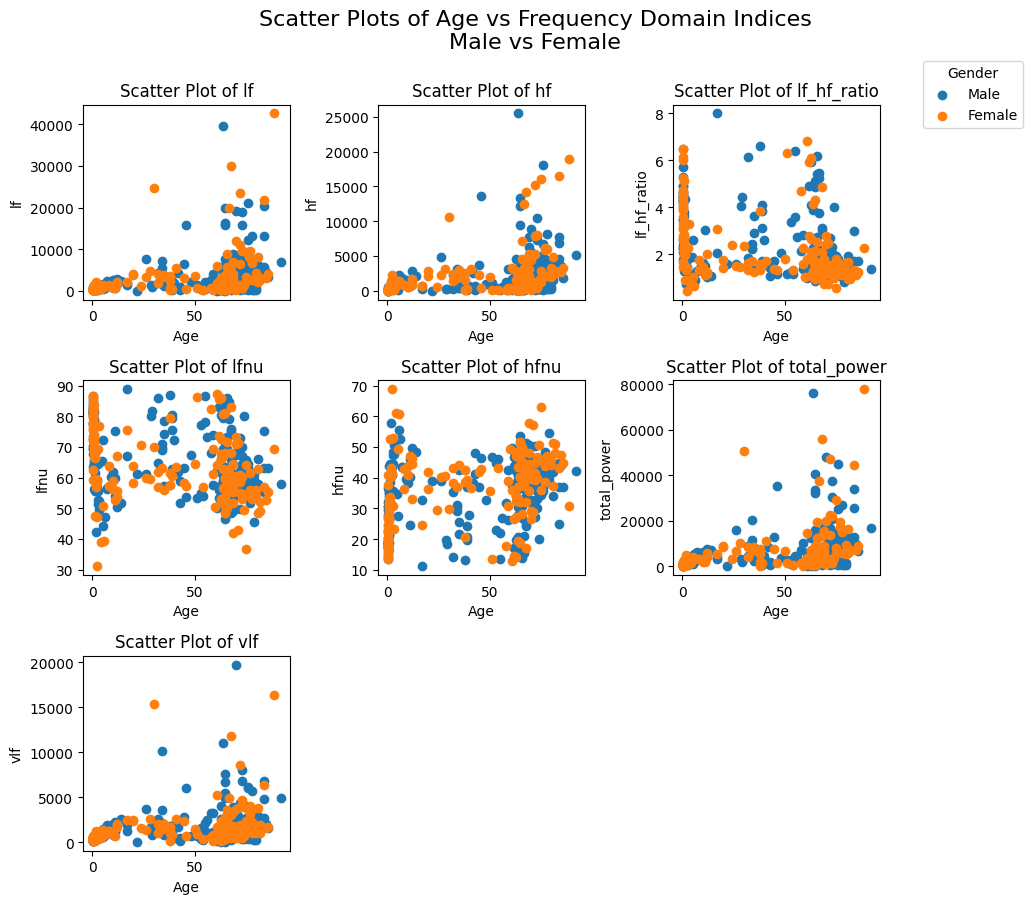

In [ ]:
# Age against all indices
_df = df.copy()
_df['gender'] = _df['gender'].map(lambda x: "Male" if x==1 else "Female")

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(freq_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(freq_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(freq_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    for gender in _df['gender'].unique():
        __df = _df[_df['gender'] == gender]
        plt.scatter(x=__df['age'], y=__df[fitur])

    plt.xlabel("Age")
    plt.ylabel(fitur)
    plt.title(f"Scatter Plot of {fitur}")

# remove unused plots
for index in range(len(freq_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

fig.legend(labels=_df['gender'].unique(), bbox_to_anchor=(1.15, 0.95), title='Gender')
plt.suptitle("Scatter Plots of Age vs Frequency Domain Indices\nMale vs Female", y=1.0, x=0.6, fontsize=16)
plt.tight_layout()
plt.show()

#### Risk

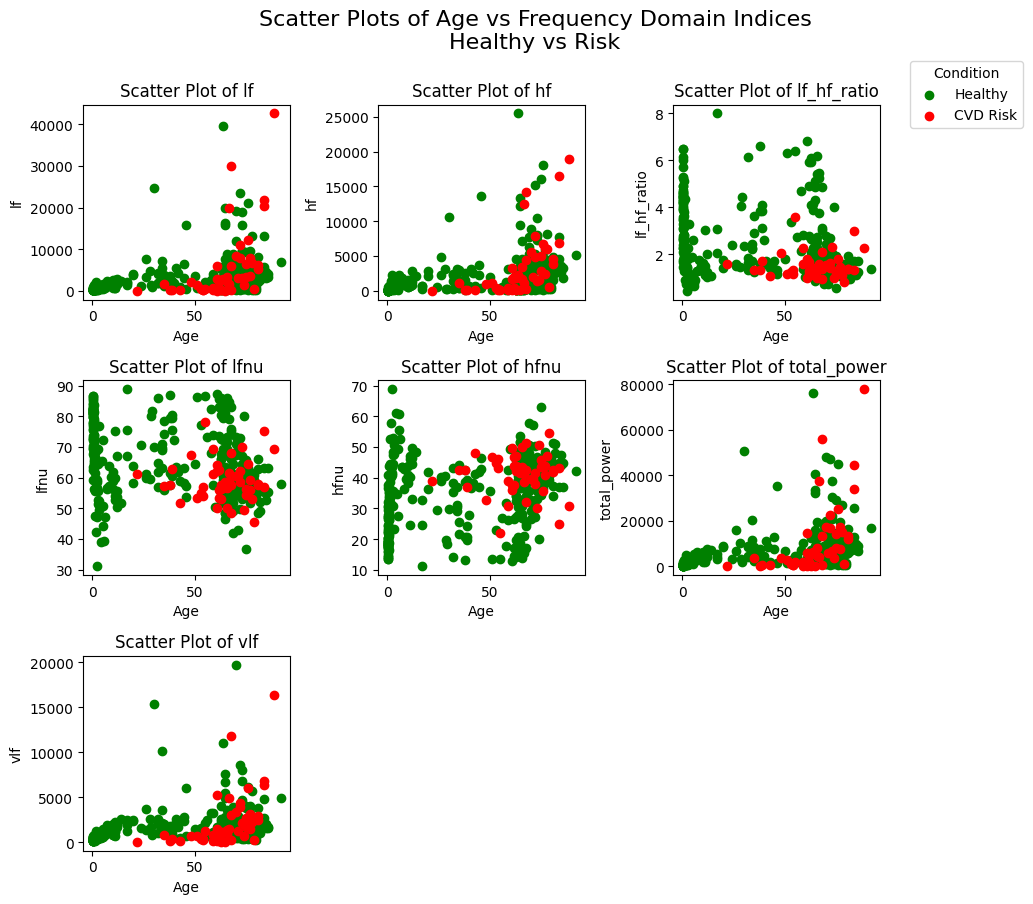

In [ ]:
# Age against all indices
_df = df.copy()
_df['risk'] = _df['risk'].map(lambda x: "CVD Risk" if x==1 else "Healthy")

color_dict = {
    "CVD Risk": 'red',
    "Healthy": 'green'
}

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(freq_domain_indices))))
lebar = int(np.ceil(np.sqrt(len(freq_domain_indices))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(freq_domain_indices):
    baris = index // tinggi
    kolom = index % tinggi

    plt.subplot(lebar, tinggi, index+1)

    for risk in _df['risk'].unique():
        __df = _df[_df['risk'] == risk]
        plt.scatter(x=__df['age'], y=__df[fitur], c=color_dict[risk])

    plt.xlabel("Age")
    plt.ylabel(fitur)
    plt.title(f"Scatter Plot of {fitur}")

# remove unused plots
for index in range(len(freq_domain_indices), tinggi**2):
    plt.subplot(lebar, tinggi, index+1)
    plt.gca().set_axis_off()

fig.legend(labels=_df['risk'].unique(), bbox_to_anchor=(1.15, 0.95), title='Condition')
plt.suptitle("Scatter Plots of Age vs Frequency Domain Indices\nHealthy vs Risk", y=1.0, x=0.6, fontsize=16)
plt.tight_layout()
plt.show()

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dbs = [
    df_healthy_rri,
    df_nsrdb,
    df_chfdb,
    df_sddb,
    df_shareedb,
    df_nsr2db,
    df_chf2db,
]
df = pd.concat(dbs, axis=0).reset_index()
df = df[columns_needed]
df = df.dropna()
df = df[(df.age != "?") & (df.gender != "?")]
df['age'] = np.array(df['age'], dtype=np.float16)
df['gender'] = df['gender'].map(lambda x: map_gender[x.lower()])
df = df.drop(columns=["db_source", "cardiac_info"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          381 non-null    float16
 1   gender       381 non-null    int64  
 2   lf           381 non-null    float64
 3   hf           381 non-null    float64
 4   lf_hf_ratio  381 non-null    float64
 5   lfnu         381 non-null    float64
 6   hfnu         381 non-null    float64
 7   total_power  381 non-null    float64
 8   vlf          381 non-null    float64
 9   mean_nni     381 non-null    float64
 10  sdnn         381 non-null    float64
 11  sdsd         381 non-null    float64
 12  nni_50       381 non-null    int64  
 13  pnni_50      381 non-null    float64
 14  nni_20       381 non-null    int64  
 15  pnni_20      381 non-null    float64
 16  rmssd        381 non-null    float64
 17  median_nni   381 non-null    float64
 18  range_nni    381 non-null    float64
 19  cvsd    

In [ ]:
if 'db_source' in df.columns:
    df = df.drop(columns=['db_source'])

df = df[df['age'] >= 10]

df_train, df_test = train_test_split(df, test_size=0.4, stratify=df['risk'], random_state=12)
print(df_train.shape)
print(df_test.shape)

(165, 26)
(111, 26)


In [ ]:
# df_train.to_csv("df_train_7-3.csv", index=False)
# df_test.to_csv("df_test_7-3.csv", index=False)

In [ ]:
X_train = df_train.drop(columns=['risk'])
y_train = df_train['risk']
X_test = df_test.drop(columns=['risk'])
y_test = df_test['risk']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(165, 25) (165,)
(111, 25) (111,)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    136
1     29
Name: risk, dtype: int64
0    91
1    20
Name: risk, dtype: int64


## Nice References

- https://medium.com/orikami-blog/exploring-heart-rate-variability-using-python-483a7037c64d

